In [96]:
import pandas as pd
import numpy as np
# import nilearn

In [97]:
data = pd.read_csv('results.csv',low_memory=False)

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1208 entries, 0 to 1207
Columns: 5241 entries, SubjectID to Unnamed: 5240
dtypes: float64(3001), int64(1), object(2239)
memory usage: 48.3+ MB


In [11]:
data_numeric = data.select_dtypes(exclude=['object'])
data_numeric.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1208 entries, 0 to 1207
Columns: 3002 entries, SubjectID to Unnamed: 5240
dtypes: float64(3001), int64(1)
memory usage: 27.7 MB


In [12]:
data_col_clean = data_numeric.dropna(axis=1)
data_col_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1208 entries, 0 to 1207
Columns: 237 entries, SubjectID to T1_label_Lattice_Histogram_Bins-20_Bins-20_Bin-6_Frequency_Max
dtypes: float64(236), int64(1)
memory usage: 2.2 MB


In [13]:
data_row_clean = data_numeric.dropna()
data_row_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1111 entries, 0 to 1207
Columns: 3002 entries, SubjectID to Unnamed: 5240
dtypes: float64(3001), int64(1)
memory usage: 25.5 MB


In [14]:
from sklearn.decomposition import PCA
pca = PCA(n_components=0.99)
X_red_train = pca.fit_transform(data_col_clean)

In [15]:
X_red_train.shape

(1208, 2)

In [16]:
data_col_clean.to_csv('Cleaned_results.csv',index=False)

In [98]:
import nibabel as nib


flair_0 = nib.load('/home/aditya/Documents/HandsonML/Brats_demo/BraTS2021_00000/BraTS2021_00000_flair.nii.gz')
t1_0 = nib.load('/home/aditya/Documents/HandsonML/Brats_demo/BraTS2021_00000/BraTS2021_00000_t1.nii.gz')
t1ce_0 = nib.load('/home/aditya/Documents/HandsonML/Brats_demo/BraTS2021_00000/BraTS2021_00000_t1ce.nii.gz')
t2_0 = nib.load('/home/aditya/Documents/HandsonML/Brats_demo/BraTS2021_00000/BraTS2021_00000_t2.nii.gz')
mask_0  = nib.load('/home/aditya/Documents/HandsonML/Brats_demo/BraTS2021_00000/BraTS2021_00000_seg.nii.gz')

flair_2 = nib.load('/home/aditya/Documents/HandsonML/Brats_demo/BraTS2021_00002/BraTS2021_00002_flair.nii.gz')
t1_2 = nib.load('/home/aditya/Documents/HandsonML/Brats_demo/BraTS2021_00002/BraTS2021_00002_t1.nii.gz')
t1ce_2 = nib.load('/home/aditya/Documents/HandsonML/Brats_demo/BraTS2021_00002/BraTS2021_00002_t1ce.nii.gz')
t2_2 = nib.load('/home/aditya/Documents/HandsonML/Brats_demo/BraTS2021_00002/BraTS2021_00002_t2.nii.gz')
mask_2  = nib.load('/home/aditya/Documents/HandsonML/Brats_demo/BraTS2021_00002/BraTS2021_00002_seg.nii.gz')

In [99]:
flair_0.shape, mask_0.shape

((240, 240, 155), (240, 240, 155))

In [100]:
imarray = flair_0.get_fdata()


In [102]:
np.amax(imarray),np.amin(imarray)

(2934.0, 0.0)

In [ ]:
def Image_scaler(image):
    max,min = np.amax(image),np.amin(image)
    scaled = np.subtract(image,min)
    


In [92]:
from sklearn.preprocessing import MinMaxScaler
# fslice = flair.slicer[:,:,-2:-1]
scaler = MinMaxScaler(feature_range=(0,255))
scaled = scaler.fit_transform(imarray)


ValueError: Found array with dim 3. MinMaxScaler expected <= 2.

In [37]:
import matplotlib.pyplot as plt
import numpy as np

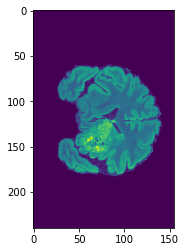

In [80]:
# plt.figure(figsize=(10,20))
plt.imshow(farray[:,100,:])

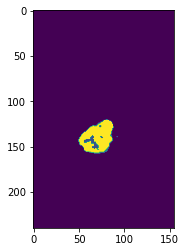

In [79]:
plt.imshow(marray[:,100,:])

In [77]:
masked = np.multiply(farray,marray)

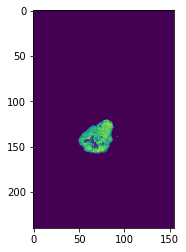

In [81]:
plt.imshow(masked[:,100,:])


In [47]:
flat = np.ndarray.flatten(masked).reshape(1,-1)


In [82]:
from sklearn.decomposition import PCA
pca = PCA(n_components=0.99999)
X_red_train = pca.fit_transform(flat)

/home/aditya/miniconda3/envs/rapids-22.02/lib/python3.8/site-packages/sklearn/decomposition/_pca.py:499: RuntimeWarning: invalid value encountered in true_divide
  explained_variance_ = (S ** 2) / (n_samples - 1)


In [83]:
X_red_train.shape

(1, 1)